In [0]:
!git clone https://github.com/Sidharth64/neura

Cloning into 'neura'...
remote: Counting objects: 36, done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 36 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [0]:
import numpy as np

class NeuralNetwork():
  def __init__(self,input_size, output_size, hidden_layer_sizes,activation):
    
    #parameters
    self.inputSize = input_size
    self.outputSize = output_size
    self.hiddenSize= hidden_layer_sizes
    self.activation=activation
  
    #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize)*.1
    self.B1 = np.zeros((1,self.hiddenSize))
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize)*.1 
    self.B2 = np.zeros((1,self.outputSize))
  
  def activate(self, s,activation):
    # activation function
    
    if activation=='logistic':
      return 1/(1+np.exp(-s))
    if activation=='tanh':
      return np.tanh(-s)
    if activation=='relu':
      return np.maximum(s,0)
  
  def backprop_activation(self, s,activation):
    #dervative
    
    if activation=='logistic':
      return s * (1 - s)
    if activation=='tanh':
      return (1-(s**2))
    if activation=='relu':
      s[s<0]=0
      return s

  
  def train (self, X, y,bs,initial_lr,max_iterations):  #bs denotes batch_size
    
    j=0
    m=0
    number_of_iterations=[]
    losses=[]
    for i in range(max_iterations):
      
      lr=initial_lr/((i+1)**0.5)
      out= self.forward(X[bs*(i-j) : bs*(i+1-j), :])
      
      
      if ((i+1-j)*bs <= X.shape[0]) :
        self.backward(X[bs*(i-j) : bs*(i+1-j), :] , y[bs*(i-j) : bs*(i+1-j), :],out,lr)
      
      else:
        self.backward(X[bs*(i-j) : , :] , y[bs*(i-j) :, :],out,lr)
        
      
      
      if ((i+1-j)*bs >= X.shape[0]) :
        
        loss=np.mean(np.sum(np.square(y - self.forward(X)),axis=1))
        number_of_iterations.append(i)
        losses.append(loss)
        j=i+1
        m=m+1
    #plot
    
    import matplotlib.pyplot as plt
    plt.plot(number_of_iterations,losses)
    plt.ylabel('Mean Square Loss')
    plt.xlabel('Number Of iterations')
    plt.show()
    
  
  
  def forward(self, X):
    #forward propagation
    
    self.z = np.dot(X, self.W1) + self.B1  
    self.z2 = self.activate(self.z,self.activation) 
    self.z3 = np.dot(self.z2, self.W2) + self.B2
    o = self.activate(self.z3,'logistic') 
    self.sum=o.sum(axis=1, keepdims=True)
    out=o/o.sum(axis=1, keepdims=True)
    return out 
  
  def backward(self, X, y,o,lr):
    # backward propgate 
    
    self.o_error = (y - o)*(2/(X.shape[0])) 
    self.o_delta = self.o_error*self.backprop_activation(o,'logistic')*(1-(o*self.sum))  # applying derivative of softmaxed sigmoid to error

    self.z2_error = self.o_delta.dot(self.W2.T) 
    self.z2_delta = self.z2_error*self.backprop_activation(self.z2,self.activation)   
    
    reg_lambda=0.0001
    self.W1 += lr*(X.T.dot(self.z2_delta) - reg_lambda*self.W1)              
    self.W2 += lr*(self.z2.T.dot(self.o_delta) -  reg_lambda*self.W2)          
    
    self.B2 -= lr*np.sum(self.o_delta, axis = 0, keepdims = True)
    self.B1 -= lr*np.sum(self.z2_delta, axis=0 , keepdims=True)
    
    
  def predict(self,X):
    output=self.forward(X)
    prediction=np.argmax(output,axis=1)
    return prediction

In [0]:
import pandas as pd
df=pd.read_csv('neura/newdata.csv')
df1=pd.read_csv('neura/newdata1.csv')
df2=pd.read_csv('neura/newdata2.csv')
df3=pd.read_csv('neura/newdata3.csv')
df4=pd.read_csv('neura/newdata4.csv')
df5=pd.read_csv('neura/newdata5.csv')
df6=pd.read_csv('neura/newdata6.csv')
df7=pd.read_csv('neura/newdata7.csv')
df8=pd.read_csv('neura/newdata8.csv')
df9=pd.read_csv('neura/newdata9.csv')
df10=pd.read_csv('neura/newdata10.csv')
df11=pd.read_csv('neura/newdata11.csv')
df12=pd.read_csv('neura/newdata12.csv')
df13=pd.read_csv('neura/newdata13.csv')
df14=pd.read_csv('neura/newdata14.csv')
df15=pd.read_csv('neura/newdata15.csv')

#d=sum of all dfs
frames=[df,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15]
d = pd.concat(frames)
finald=d.iloc[:,2:1027]

X=finald.values

y=d.iloc[:,1:2]

Y=y.values
from keras.utils import to_categorical
encoded_y=to_categorical(Y)

#preprocess
X=np.true_divide(X, 255)



from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, encoded_y, test_size=0.1)

Using TensorFlow backend.


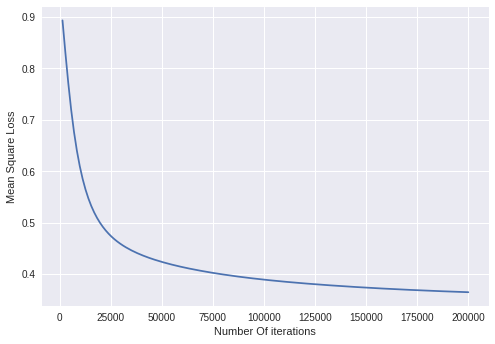

In [0]:
a = NeuralNetwork(1024,46,300,'logistic')
a.train(X_train,y_train,50,20,200000)



In [0]:
predictions=a.predict(X_valid)

Y_valid=np.argmax(y_valid,axis=1)

k=0
for i in range(len(predictions)):
  if predictions[i]==Y_valid[i]:
    
    k=k+1
    
print ("Validation accuracy : " )    
print(k/len(predictions))

Validation accuracy : 
0.8562659846547315


In [0]:
testdf=pd.read_csv('neura/devnagri_test_public.csv')
finaltest_df=testdf.iloc[:,1:1027]

X_test=finaltest_df.values

#preprocess
X_test=np.true_divide(X_test, 255)

test_predictions=a.predict(X_test)


In [0]:
print(test_predictions)

[45 11  6 ...  6 12 15]
